In [ ]:
# 20250408 오랜만의 유성쌤 수업 ~~~~ ^_^ mysql mongodb 등 dockerfile로 열어보기 ~~!

In [ ]:
# CRUD

# R : 읽기 / C : 쓰기 / D : 삭제 / U : 수정

In [ ]:
!ping MONGODB

In [1]:
!ping 172.18.0.2

PING 172.18.0.2 (172.18.0.2) 56(84) bytes of data.
64 bytes from 172.18.0.2: icmp_seq=1 ttl=64 time=0.134 ms
64 bytes from 172.18.0.2: icmp_seq=2 ttl=64 time=0.076 ms
64 bytes from 172.18.0.2: icmp_seq=3 ttl=64 time=0.250 ms
64 bytes from 172.18.0.2: icmp_seq=4 ttl=64 time=0.161 ms
^C

--- 172.18.0.2 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3418ms
rtt min/avg/max/mdev = 0.076/0.155/0.250/0.062 ms


In [3]:
!ping 172.18.0.3

PING 172.18.0.3 (172.18.0.3) 56(84) bytes of data.
64 bytes from 172.18.0.3: icmp_seq=1 ttl=64 time=0.044 ms
64 bytes from 172.18.0.3: icmp_seq=2 ttl=64 time=0.156 ms
64 bytes from 172.18.0.3: icmp_seq=3 ttl=64 time=0.143 ms
64 bytes from 172.18.0.3: icmp_seq=4 ttl=64 time=0.090 ms
^C

--- 172.18.0.3 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3334ms
rtt min/avg/max/mdev = 0.044/0.108/0.156/0.044 ms


In [1]:
!ping 172.18.0.4

PING 172.18.0.4 (172.18.0.4) 56(84) bytes of data.
64 bytes from 172.18.0.4: icmp_seq=1 ttl=64 time=0.144 ms
64 bytes from 172.18.0.4: icmp_seq=2 ttl=64 time=0.098 ms
64 bytes from 172.18.0.4: icmp_seq=3 ttl=64 time=0.065 ms
^C

--- 172.18.0.4 ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2212ms
rtt min/avg/max/mdev = 0.065/0.102/0.144/0.032 ms


In [2]:
!ping 172.18.0.6

PING 172.18.0.6 (172.18.0.6) 56(84) bytes of data.
From 172.18.0.5 icmp_seq=1 Destination Host Unreachable
From 172.18.0.5 icmp_seq=2 Destination Host Unreachable
From 172.18.0.5 icmp_seq=3 Destination Host Unreachable
From 172.18.0.5 icmp_seq=4 Destination Host Unreachable
From 172.18.0.5 icmp_seq=5 Destination Host Unreachable
From 172.18.0.5 icmp_seq=6 Destination Host Unreachable
^C

--- 172.18.0.6 ping statistics ---
7 packets transmitted, 0 received, +6 errors, 100% packet loss, time 6633ms
pipe 3


In [3]:
#!pip install mysql-connector-python

In [5]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host = "mysql", # MySQL 서버 주소 !
        user = "root",
        password = "1234"
    )
    
    if conn.is_connected():
        print("MySQL 서버에 성공적으로 연결되었습니다.")
except:
    print("MySQL 연결 실패 !", err)
finally:
    if conn.is_connected():
        print("연결중 ...")

MySQL 서버에 성공적으로 연결되었습니다.
연결중 ...


In [6]:
# 커서 생성
cursor = conn.cursor()
que = "CREATE DATABASE IF NOT EXISTS judb"
cursor.execute(que)
conn.close()

In [8]:
# MySQL에 연결
conn = mysql.connector.connect(
    host = "mysql", # MySQL 서버주소
    user = "root",
    password ="1234",
    database = "judb" # 사용할 데이터베이스 !
)
cursor = conn.cursor()
print("MySQL 연결 성공 !")

MySQL 연결 성공 !


In [9]:
# 테이블 생성
query = "CREATE TABLE IF NOT EXISTS user(id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(50), age INT, city VARCHAR(50))"
cursor.execute(query)
print("테이블 생성 완료 !")

테이블 생성 완료 !


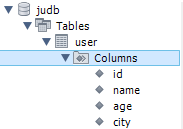

In [13]:
# 단일 데이터 삽입
# sql = f"INSERT INTO users (name, age, city) VALUES ({name}, {age}, {city})" : 이렇게 하면 이름의 형식이 어떻게 되든 막을 수 없다 !
                                                     # "Alice); DROP TABLE users;
sql = "INSERT INTO user (name, age, city) VALUES (%s, %s, %s)"
values = ("Alice", 25, "Seoul")
cursor.execute(sql, values)
conn.commit() # 커밋을 해야~ 저장이 됨 ~
print("1개의 데이터 삽입 완료 ! ID : ", cursor.lastrowid)

1개의 데이터 삽입 완료 ! ID :  5


In [12]:
# 여러 개의 데이터 삽입 !!
m_values = [("superman", 33, "Busan"), ("Cutegirl", 17, "Incheon"), ("Coolboy", 22, "Jeju")]
cursor.executemany(sql, m_values)
conn.commit()
print("여러 개의 데이터 삽입 완료 !")

여러 개의 데이터 삽입 완료 !


In [15]:
# 모든 데이터 조회
que = "SELECT * FROM user"
cursor.execute(que)
users = cursor.fetchall()
# print(users)
for user in users:
    print(user)

(1, 'Alice', 25, 'Seoul')
(2, 'superman', 33, 'Busan')
(3, 'Cutegirl', 17, 'Incheon')
(4, 'Coolboy', 22, 'Jeju')
(5, 'Alice', 25, 'Seoul')


In [20]:
que = "SELECT * FROM user"
filters = " WHERE age >= 24"
cursor.execute(que+filters)

filtered = cursor.fetchall()
for f in filtered : 
    print(f)

(1, 'Alice', 29, 'Seoul')
(2, 'superman', 33, 'Busan')
(5, 'Alice', 29, 'Seoul')


In [26]:
# 특정 사용자의 나이 수정
sql = "UPDATE user SET age = %s WHERE name = %s"
values = (19, "Alice")
cursor.execute(sql,values)
conn.commit()
print("수정된 행 개수 : ", cursor.rowcount)

수정된 행 개수 :  0


In [28]:
# 특정 사용자 삭제
que = "DELETE FROM user WHERE city = %s"
filters = ["jeju"]
cursor.execute(que, filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다 ! ")

['jeju']에 해당하는 목록을 삭제하였습니다 ! 


In [31]:
# 특정 조건 사용자 삭제
que = "DELETE FROM user WHERE age> %s AND city = %s"
filters = (19, "seoul")
cursor.execute(que, filters)
conn.commit()
print(f"{filters}에 해당하는 목록을 삭제하였습니다 ! ")

(19, 'seoul')에 해당하는 목록을 삭제하였습니다 ! 
